<a href="https://colab.research.google.com/github/samancha/computer-vision-masters/blob/main/image_captioning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install -q mlcroissant

In [3]:
import pandas as pd
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import os
from google.colab import drive

In [4]:
from mlcroissant import Dataset

ds = Dataset(jsonld="https://huggingface.co/api/datasets/nlphuji/flickr30k/croissant")
records = ds.records("TEST")

  -  [Metadata(flickr30k)] Property "http://mlcommons.org/croissant/citeAs" is recommended, but does not exist.
  -  [Metadata(flickr30k)] Property "https://schema.org/datePublished" is recommended, but does not exist.
  -  [Metadata(flickr30k)] Property "https://schema.org/license" is recommended, but does not exist.
  -  [Metadata(flickr30k)] Property "https://schema.org/version" is recommended, but does not exist.


In [6]:
record_sets = ds.metadata.record_sets
print(record_sets[0].uuid)

TEST


In [7]:
record_set_df = pd.DataFrame(ds.records(record_set=record_sets[0].uuid))
record_set_df.head()
record_set_df.info()

subset_df = record_set_df.sample(frac=0.01, random_state=42)
subset_df.info()

,TEST/image,TEST/caption,TEST/sentids,TEST/split,TEST/img_id,TEST/filename
0,<PIL.JpegImagePlugin.JpegImageFile image mode=...,[b'Two young guys with shaggy hair look at the...,"[b'0', b'1', b'2', b'3', b'4']",b'train',b'0',b'1000092795.jpg'
1,<PIL.JpegImagePlugin.JpegImageFile image mode=...,[b'Several men in hard hats are operating a gi...,"[b'5', b'6', b'7', b'8', b'9']",b'train',b'1',b'10002456.jpg'
2,<PIL.JpegImagePlugin.JpegImageFile image mode=...,[b'A child in a pink dress is climbing up a se...,"[b'10', b'11', b'12', b'13', b'14']",b'train',b'2',b'1000268201.jpg'
3,<PIL.JpegImagePlugin.JpegImageFile image mode=...,[b'Someone in a blue shirt and hat is standing...,"[b'15', b'16', b'17', b'18', b'19']",b'train',b'3',b'1000344755.jpg'
4,<PIL.JpegImagePlugin.JpegImageFile image mode=...,"[b'Two men, one in a gray shirt, one in a blac...","[b'20', b'21', b'22', b'23', b'24']",b'train',b'4',b'1000366164.jpg'


b'A man stands upon a large cart-load of hay while two horses drawing the cart snack on a pile of hay before them.'
b'A man wearing a hat stands atop an overstuffed hay wagon while two horses partake in some fallen hay.'
b'A man is standing on top of a large pile of hay which is being pulled in a cart by two horses.'
b'Two horses, pulling a cart full of hay, are eating hay from the ground.'
b'A man is gathering hay on a horse drawn wagon.'


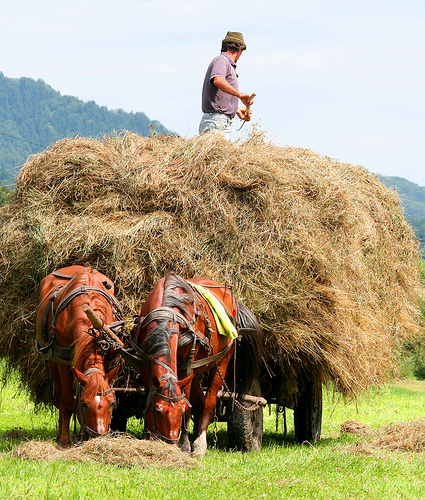

In [14]:
print(*(caption for caption in subset_df["TEST/caption"].iloc[3]), sep='\n')
subset_df["TEST/image"].iloc[3]

In [15]:
# Define a resizing function for PIL images
def preprocess_image(pil_image):
    img = tf.convert_to_tensor(pil_image)  # Convert PIL image to tensor
    img = tf.image.resize(img, [224, 224])  # Resize to target dimensions
    img = img / 255.0  # Scale pixel values to [0, 1] range
    return img

# Apply the function to each image in your DataFrame
subset_df['resized_image'] = subset_df['TEST/image'].apply(preprocess_image)


In [24]:
dataset = tf.data.Dataset.from_tensor_slices((list(subset_df['resized_image']), list(subset_df['TEST/caption'])))
batch_size = 32
dataset = dataset.batch(batch_size).shuffle(buffer_size=1000)
print(dataset.element_spec)

(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 5), dtype=tf.string, name=None))


In [ ]:
# Downloading coco dataset
drive.mount("/content/drive")
dir = "/content/drive/MyDrive/tfds_datasets/"
ds, ds_info = tfds.load('coco_captions', split='test', with_info=True, data_dir=dir)


Mounted at /content/drive


Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

In [ ]:
fig = tfds.show_examples(ds, ds_info)

In [ ]:
# Using coco dataset with FiftyOne
# https://medium.com/voxel51/the-coco-dataset-best-practices-for-downloading-visualization-and-evaluation-68a3d7e97fb7
